In [1]:
from neuralogic.nn import get_evaluator
from neuralogic.core import Template, R, Settings, Transformation, Combination, Aggregation
from neuralogic.core.constructs.function.tree import FunctionContainer
from neuralogic.core.settings import Settings
from neuralogic.dataset import Dataset
from neuralogic.optim import SGD

F = FunctionContainer()
train_dataset = Dataset()
template = Template()

C:\Users\kraus\Plocha\BAK\PyNeuraLogicFork\neuralogic\core\builder\builder.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
a = 100
tree = F.softmax[F.softmax(F.softmax(a))]
print(tree.create_metadata())
print([Combination.SOFTMAX, Transformation.SOFTMAX, Aggregation.SOFTMAX])

[<neuralogic.core.constructs.function.function.Combination object at 0x000001B658EF7140>, <neuralogic.core.constructs.function.function.Transformation object at 0x000001B658EF6B80>, <neuralogic.core.constructs.function.softmax.Softmax object at 0x000001B658E9C1D0>]
[<neuralogic.core.constructs.function.function.Combination object at 0x000001B658EF7140>, <neuralogic.core.constructs.function.function.Transformation object at 0x000001B658EF6B80>, <neuralogic.core.constructs.function.softmax.Softmax object at 0x000001B658E9C1D0>]


In [3]:
a = 100
tree = F.softmax[F.softmax(a)]
print(tree.create_metadata())
print([Combination.SOFTMAX, Aggregation.SOFTMAX])

[<neuralogic.core.constructs.function.function.Combination object at 0x000001B658EF7140>, <neuralogic.core.constructs.function.softmax.Softmax object at 0x000001B658E9C1D0>]
[<neuralogic.core.constructs.function.function.Combination object at 0x000001B658EF7140>, <neuralogic.core.constructs.function.softmax.Softmax object at 0x000001B658E9C1D0>]


In [4]:
tree = F.softmax(F.softmax(a))
print(tree.create_metadata())
print([Combination.SOFTMAX, Transformation.SOFTMAX])

[<neuralogic.core.constructs.function.function.Combination object at 0x000001B658EF7140>, <neuralogic.core.constructs.function.function.Transformation object at 0x000001B658EF6B80>]
[<neuralogic.core.constructs.function.function.Combination object at 0x000001B658EF7140>, <neuralogic.core.constructs.function.function.Transformation object at 0x000001B658EF6B80>]


In [5]:
train_dataset.add_example([R.b[3], R.c[5]])
train_dataset.add_queries([R.a[8]])

In [6]:
#template += (R.a <= (R.b, R.c)) | [Combination.AVG, Transformation.IDENTITY, Aggregation.AVG]
template += (R.a <= (x:=R.b, y:= R.c)) >> F.avg[F.relu(x + y)]

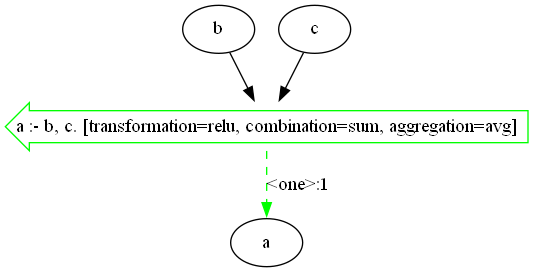

In [7]:
template.draw()

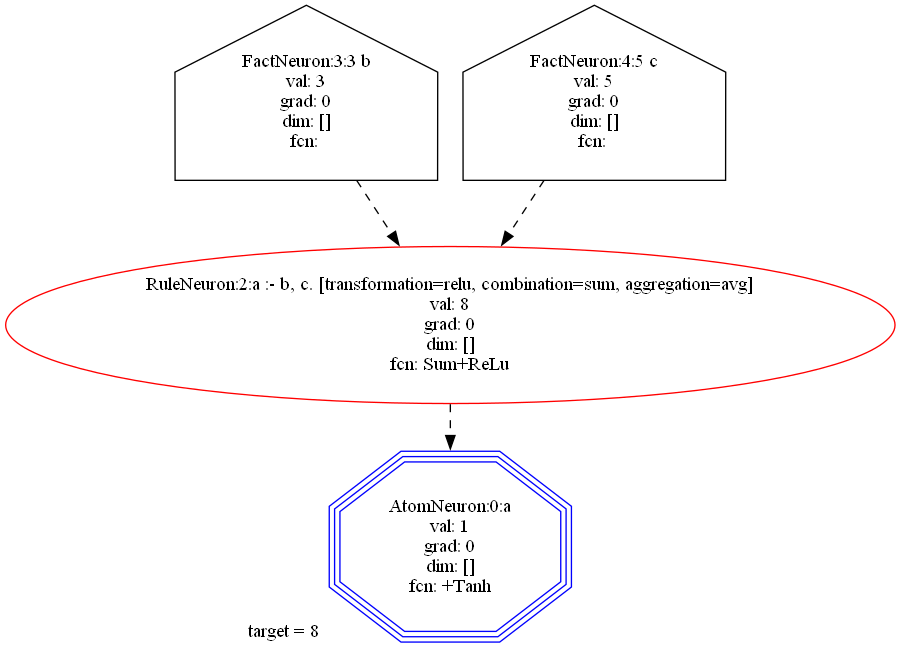

In [8]:
settings = Settings(optimizer=SGD(), epochs=1)
neuralogic_evaluator = get_evaluator(template, settings)
build_dataset = neuralogic_evaluator.build_dataset(train_dataset)

for _ in neuralogic_evaluator.train(train_dataset):
    pass

build_dataset[0].draw()